# Predicting Insurance Premiums with Data-Driven Insights for SecureLife Insurance Co. 

## Problem Statement

### SecureLife Insurance Co. rely heavily on accurate premium prediction models to balance competitiveness with profitability. You're hired as a data scientist to develop a predictive model for estimating insurance premiums. 

## Objectives

### Develop a regression model to predict the Premium Amount based on the data provided. The key objectives are:

- Clean and preprocess the dataset 
- Explore Features importance and relationships
- Build and evaluate a robust predictive model
- Interpret results and provide actionable insights. 

# Task 

## A. Data Understanding and Preprocessing 


### Import necessary libraries

In [2]:
# import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  


### Load the dataset

In [3]:
# load the dataset 
df = pd.read_csv("Insurance Premium Prediction Dataset.csv")
df.head() 

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.0,Male,99990.0,Married,1.0,Master's,NaN,31.074627,Urban,Comprehensive,NaN,13,320.0,5,308.0,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.0,Male,2867.0,Single,1.0,Bachelor's,NaN,50.271335,Urban,Comprehensive,NaN,3,694.0,4,517.0,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.0,Female,30154.0,Divorced,3.0,Bachelor's,NaN,14.714909,Suburban,Comprehensive,2.0,16,652.0,8,849.0,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.0,Female,48371.0,Divorced,0.0,PhD,Self-Employed,25.346926,Rural,Comprehensive,1.0,11,330.0,7,927.0,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.0,Female,54174.0,Divorced,0.0,High School,Self-Employed,6.659499,Urban,Comprehensive,NaN,9,NaN,8,303.0,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


In [4]:
# shape of the dataset
df.shape

(278860, 20)

### Understand the dataset

In [5]:
# understand the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [6]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns 

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'premium_amount',
       'policy_start_date', 'customer_feedback', 'smoking_status',
       'exercise_frequency', 'property_type'],
      dtype='object')

In [7]:
df.dtypes

age                     float64
gender                   object
annual_income           float64
marital_status           object
number_of_dependents    float64
education_level          object
occupation               object
health_score            float64
location                 object
policy_type              object
previous_claims         float64
vehicle_age               int64
credit_score            float64
insurance_duration        int64
premium_amount          float64
policy_start_date        object
customer_feedback        object
smoking_status           object
exercise_frequency       object
property_type            object
dtype: object

In [8]:
# check for categorical data 
d = df.dtypes
d[d == 'object'] 

gender                object
marital_status        object
education_level       object
occupation            object
location              object
policy_type           object
policy_start_date     object
customer_feedback     object
smoking_status        object
exercise_frequency    object
property_type         object
dtype: object

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278855    False
278856    False
278857    False
278858    False
278859    False
Length: 278860, dtype: bool

### Check for missing values

In [10]:
# identify the missing values
df.isna().sum()

age                      4685
gender                      0
annual_income           13955
marital_status           5019
number_of_dependents    27886
education_level             0
occupation              81288
health_score            10597
location                    0
policy_type                 0
previous_claims         81288
vehicle_age                 0
credit_score            27886
insurance_duration          0
premium_amount           1841
policy_start_date           0
customer_feedback       18349
smoking_status              0
exercise_frequency          0
property_type               0
dtype: int64

### check for outliers

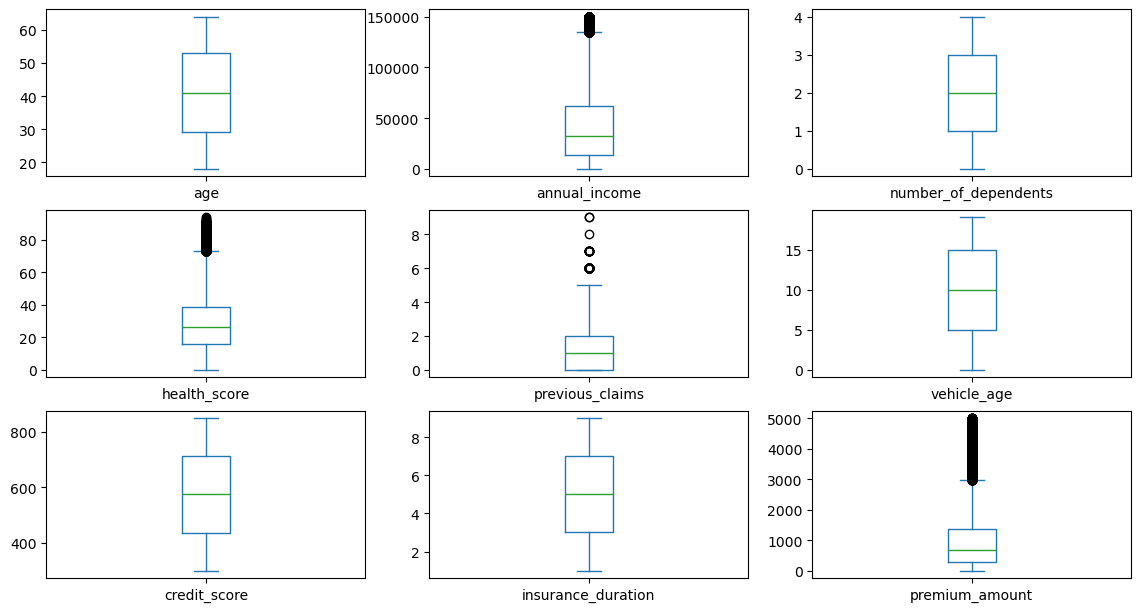

In [11]:
df.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show() 

In [12]:
# Fill the missing value 
for col in df == 'object' :
    df[col] = df[col].fillna(df[col].mode()[0]) 
    
# Fill missing values
for col in ['age', 'annual_income', 'number_of_dependents', 'health_score', 'credit_score', 'previous_claims']:
    df[col] = df[col].fillna(df[col].median())

for col in ['occupation', 'marital_status', 'customer_feedback']:
    df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(subset=['premium_amount'], inplace=True)

# Log-transform target
df['log_premium_amount'] = np.log1p(df['premium_amount'])

# Confirm nulls
df.isnull().sum()

age                     0
gender                  0
annual_income           0
marital_status          0
number_of_dependents    0
education_level         0
occupation              0
health_score            0
location                0
policy_type             0
previous_claims         0
vehicle_age             0
credit_score            0
insurance_duration      0
premium_amount          0
policy_start_date       0
customer_feedback       0
smoking_status          0
exercise_frequency      0
property_type           0
log_premium_amount      0
dtype: int64

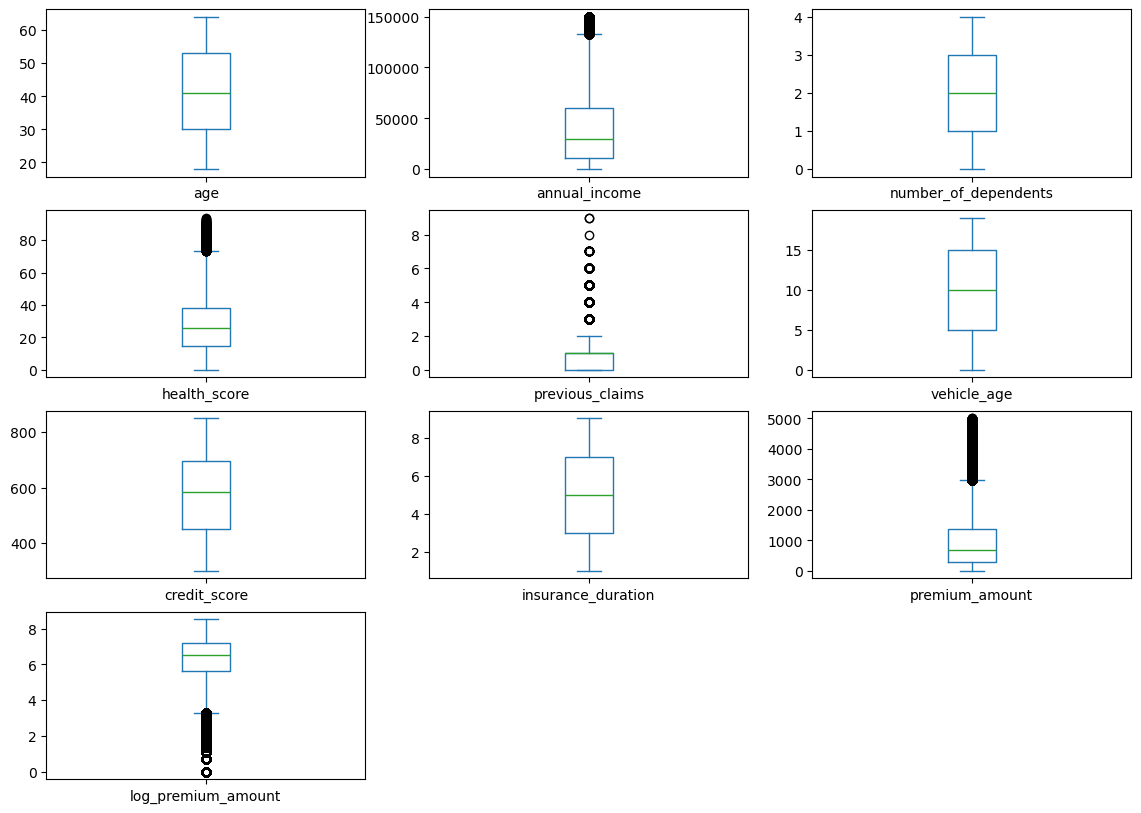

In [13]:
df.plot(kind='box', layout=(4,3), figsize=(14, 10), subplots=True)
plt.show() 

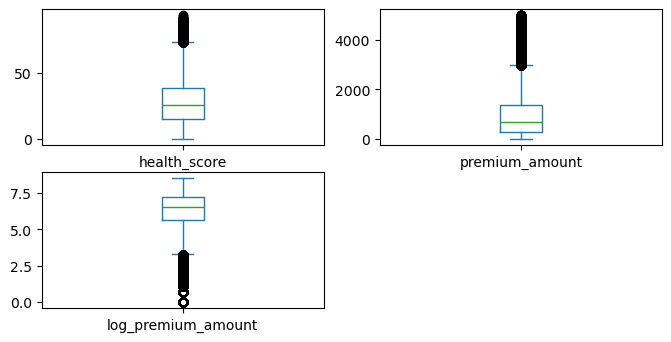

In [14]:
df[['health_score', 'premium_amount', 'log_premium_amount']].plot(kind='box', layout=(3,2), figsize=(8,6), subplots=True)
plt.show();

In [15]:
df['health_score'].isna().sum()

np.int64(0)

In [16]:
df.describe(include='all')

,age,gender,annual_income,marital_status,number_of_dependents,education_level,occupation,health_score,location,policy_type,...,vehicle_age,credit_score,insurance_duration,premium_amount,policy_start_date,customer_feedback,smoking_status,exercise_frequency,property_type,log_premium_amount
count,278860.000000,278860,278860.000000,278860,278860.000000,278860,278860,278860.000000,278860,278860,...,278860.000000,278860.000000,278860.000000,278860.000000,278860,278860,278860,278860,278860,278860.000000
unique,NaN,2,NaN,3,NaN,4,3,NaN,3,3,...,NaN,NaN,NaN,NaN,181607,3,2,4,3,NaN
top,NaN,Male,NaN,Single,NaN,PhD,Self-Employed,NaN,Suburban,Premium,...,NaN,NaN,NaN,NaN,2022-08-30 15:21:39.134960,Average,Yes,Weekly,House,NaN
freq,NaN,139754,NaN,96516,NaN,69955,147196,NaN,93482,93298,...,NaN,NaN,NaN,NaN,16,105255,139635,70238,93228,NaN
mean,41.255630,NaN,40074.048318,NaN,1.998243,NaN,NaN,27.499401,NaN,NaN,...,9.520283,575.325845,5.007764,959.747070,NaN,NaN,NaN,NaN,NaN,6.283699
std,13.554977,NaN,35644.373752,NaN,1.339837,NaN,NaN,16.583968,NaN,NaN,...,5.767915,150.671069,2.581349,909.761262,NaN,NaN,NaN,NaN,NaN,1.333531
min,18.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.035436,NaN,NaN,...,0.000000,300.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,30.000000,NaN,11193.000000,NaN,1.000000,NaN,NaN,14.894862,NaN,NaN,...,5.000000,452.000000,3.000000,279.000000,NaN,NaN,NaN,NaN,NaN,5.634790
50%,41.000000,NaN,29914.000000,NaN,2.000000,NaN,NaN,25.612741,NaN,NaN,...,10.000000,584.000000,5.000000,682.000000,NaN,NaN,NaN,NaN,NaN,6.526495
75%,53.000000,NaN,60028.750000,NaN,3.000000,NaN,NaN,38.362743,NaN,NaN,...,15.000000,697.000000,7.000000,1360.000000,NaN,NaN,NaN,NaN,NaN,7.215975


In [17]:
# print missing values 
print(df.isnull().sum())

age                     0
gender                  0
annual_income           0
marital_status          0
number_of_dependents    0
education_level         0
occupation              0
health_score            0
location                0
policy_type             0
previous_claims         0
vehicle_age             0
credit_score            0
insurance_duration      0
premium_amount          0
policy_start_date       0
customer_feedback       0
smoking_status          0
exercise_frequency      0
property_type           0
log_premium_amount      0
dtype: int64


In [18]:
df['education_level'].value_counts() 

education_level
PhD            69955
Bachelor's     69930
Master's       69815
High School    69160
Name: count, dtype: int64

In [19]:
df['customer_feedback'].value_counts()

customer_feedback
Average    105255
Poor        86872
Good        86733
Name: count, dtype: int64

In [20]:
df['premium_amount'].value_counts

<bound method IndexOpsMixin.value_counts of 0          308.0
1          517.0
2          849.0
3          927.0
4          303.0
           ...  
278855     367.0
278856    3044.0
278857    1334.0
278858     662.0
278859    1240.0
Name: premium_amount, Length: 278860, dtype: float64>

### Handle skewed numerical features

<Axes: xlabel='occupation', ylabel='count'>

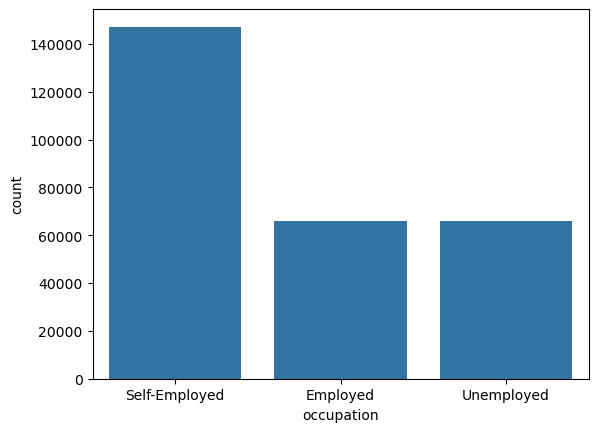

In [21]:
sns.countplot(data=df, x='occupation')


## Check customers feedback with (Average) Premium amount

In [22]:
(df['premium_amount']<500).sum()  

np.int64(111280)

- ## The average Premium Amount is 111,280.

## Step 2: Perform Exploratory Data Analysis (EDA) 

## Univariate Analysis 
- ## Target variable distribution of premium amount

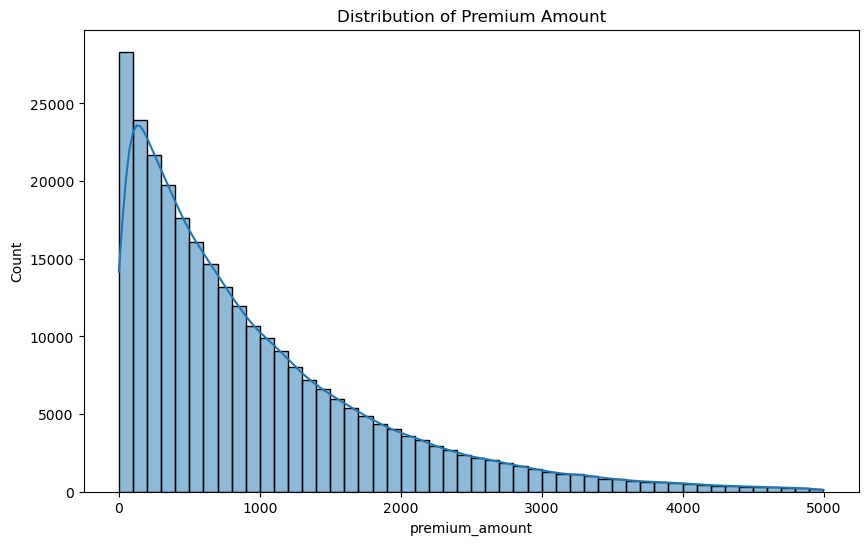

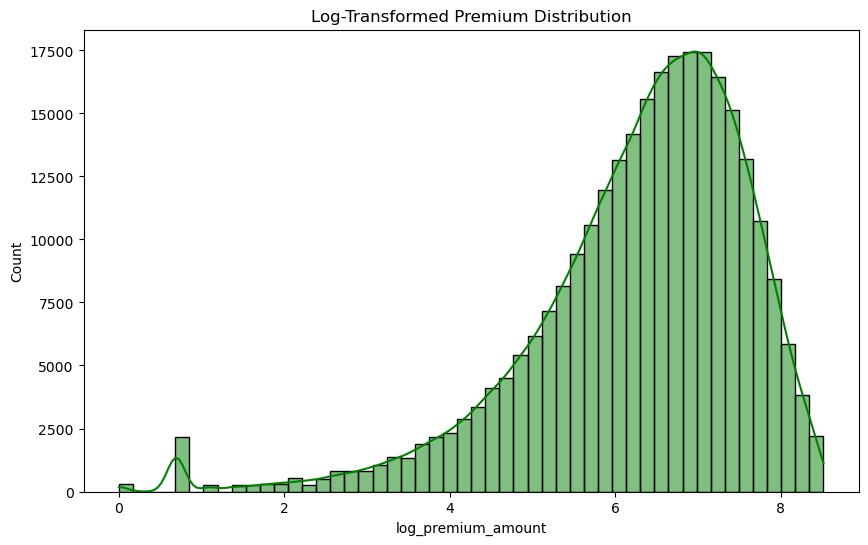

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['premium_amount'], bins= 50, kde=True)
plt.title("Distribution of Premium Amount")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['log_premium_amount'], bins=50, kde=True, color='green')
plt.title('Log-Transformed Premium Distribution')
plt.show()

- Using multivariate and bivariate analysis


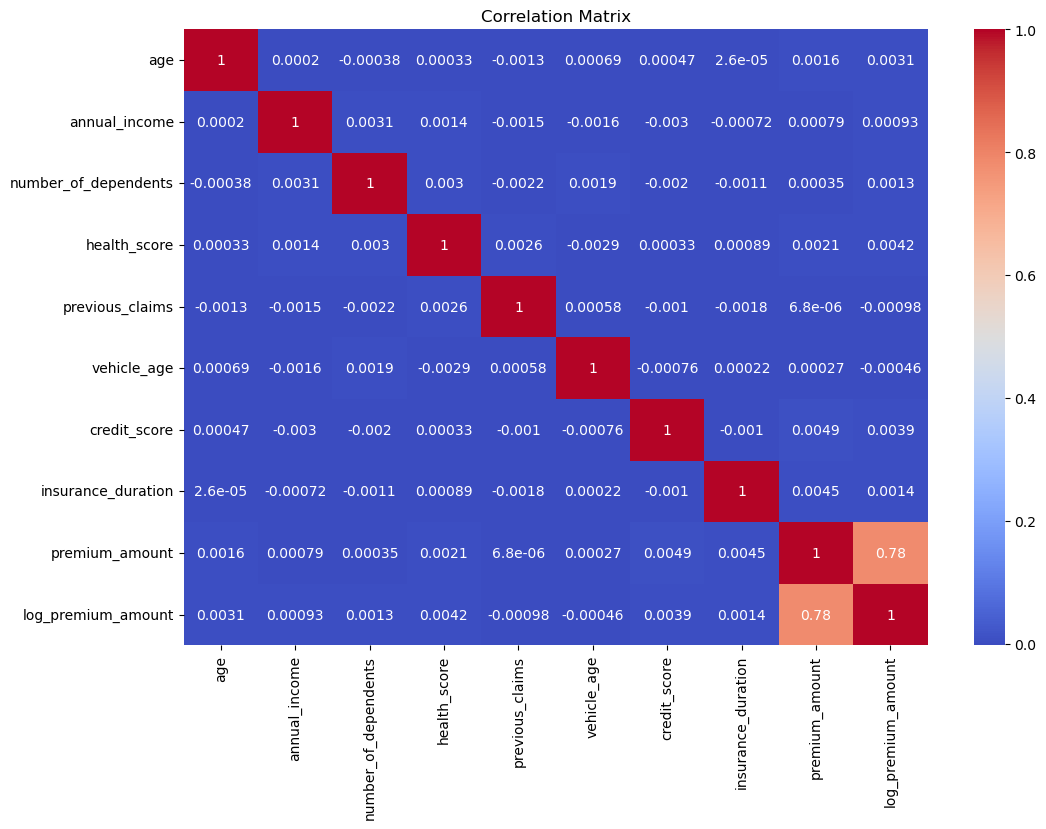

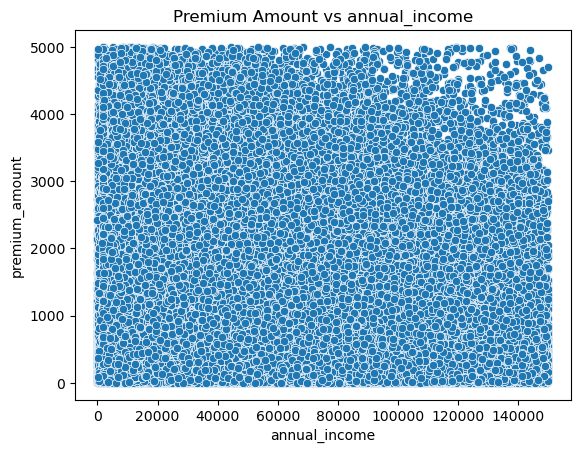

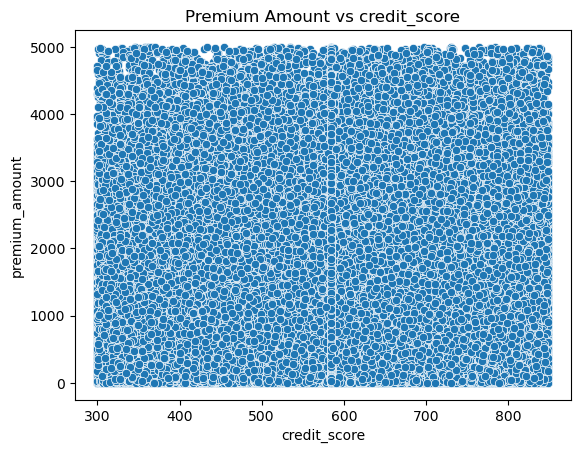

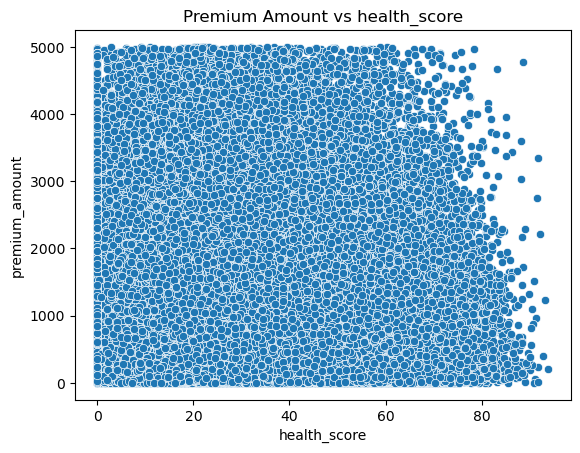

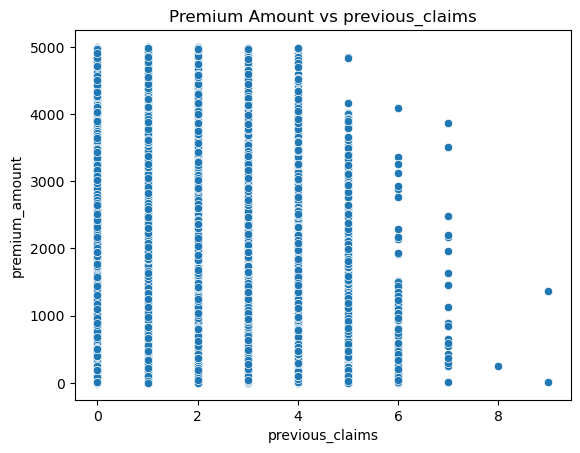

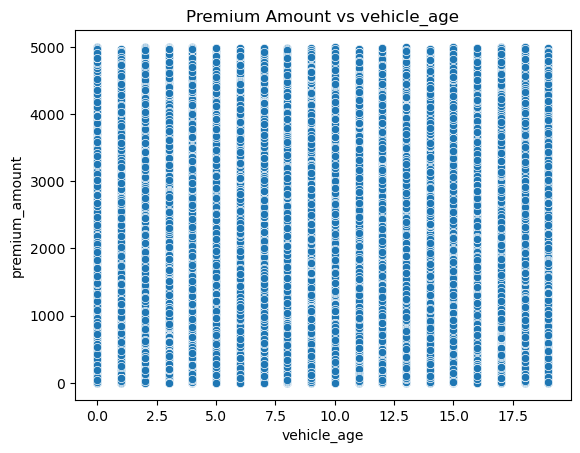

In [24]:


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Top features
top_features = ['annual_income', 'credit_score', 'health_score', 'previous_claims', 'vehicle_age']
for feature in top_features:
    sns.scatterplot(data=df, x=feature, y='premium_amount')
    plt.title(f'Premium Amount vs {feature}')
    plt.show()

### Perform Features Engineering 

In [25]:
# Feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
df.dtypes

age                     float64
gender                   object
annual_income           float64
marital_status           object
number_of_dependents    float64
education_level          object
occupation               object
health_score            float64
location                 object
policy_type              object
previous_claims         float64
vehicle_age               int64
credit_score            float64
insurance_duration        int64
premium_amount          float64
policy_start_date        object
customer_feedback        object
smoking_status           object
exercise_frequency       object
property_type            object
log_premium_amount      float64
dtype: object

In [40]:
# Feature engineering
# Create BMI categories
# df['bmi_category'] = pd.cut(df['bmi'], 
#                            bins=[0, 18.5, 25, 30, 100],
#                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Age groups
df['age_group'] = pd.cut(df['age'],
                        bins=[0, 30, 45, 60, 100],
                        labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# Prepare features and target
X = df.drop('premium_amount', axis=1)
y = df['premium_amount']

# Identify categorical and numerical features
cat_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove date features as we've extracted duration
if 'policy_start_date' in num_features:
    num_features.remove('policy_start_date')
if 'policy_start_date' in X.columns:
    X = X.drop('policy_start_date', axis=1)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Feature selection
X_processed = preprocessor.fit_transform(X)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_processed, y)

# Get feature scores
features = (preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features).tolist() + 
            num_features)
feature_scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values('Score', ascending=False)

print("Feature importance scores:")
display(feature_scores)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores')
plt.show()

ValueError: A given column is not a column of the dataframe

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Evaluate each model
results = []
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f"{name} evaluation completed.")

# Display results
results_df = pd.DataFrame(results)
display(results_df.sort_values('R2', ascending=False))

# Plot model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Comparison (R-squared)')
plt.xticks(rotation=45)
plt.show()

In [26]:
df['age'].value_counts 

<bound method IndexOpsMixin.value_counts of 0         56.0
1         46.0
2         32.0
3         60.0
4         25.0
          ... 
278855    53.0
278856    19.0
278857    45.0
278858    60.0
278859    50.0
Name: age, Length: 278860, dtype: float64>

In [ ]:
df.get

In [37]:
## 4. Feature Engineering
df_encoded = pd.get_dummies(df, drop_first=True) 

X = df_encoded.drop(['premium_amount', 'policy_start_date', 'log_premium_amount'], axis=1)  
y = df_encoded['log_premium_amount'] 


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MemoryError: Unable to allocate 47.2 GiB for an array with shape (278860, 181607) and data type bool

In [32]:
# Prepare features and target
X = df.drop('premium_amount', axis=1)
y = df['premium_amount']

# Identify categorical and numerical features
cat_features = X.select_dtypes(include=['category', 'object']).columns.tolist()
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove date features as we've extracted duration
if 'policy_start_date' in num_features:
    num_features.remove('policy_start_date')
if 'policy_start_date' in X.columns:
    X = X.drop('policy_start_date', axis=1)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

# Feature selection
X_processed = preprocessor.fit_transform(X)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_processed, y)

# Get feature scores
features = (preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features).tolist() + 
            num_features)
feature_scores = pd.DataFrame({'Feature': features, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values('Score', ascending=False)

print("Feature importance scores:")
display(feature_scores)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance Scores')
plt.show()

ValueError: A given column is not a column of the dataframe

## Training the model

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'SVR': SVR()
}

# Evaluate each model
results = []
for name, model in models.items():
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })
    
    print(f"{name} evaluation completed.")

# Display results
results_df = pd.DataFrame(results)
display(results_df.sort_values('R2', ascending=False))

# Plot model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Comparison (R-squared)')
plt.xticks(rotation=45)
plt.show()

ValueError: A given column is not a column of the dataframe